### Importar Datos

In [1]:
import netCDF4 as nc
import rasterio as rio
import rasterio
from rasterio.mask import mask
import rioxarray as rxr
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pathlib
import geopandas
from osgeo import gdal
from pyproj import CRS
# import cartopy.crs as ccrs
import pandas as pd
from rasterio.enums import Resampling
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ruta_base = "../DATOS"

### Leer shape file Antioquia

In [3]:
sf = geopandas.read_file(f'{ruta_base}/SHAPES/Antioquia.shp')

### ERA5 - Coberturas:

In [6]:
lndc = rasterio.open(f'{ruta_base}/ERA5_land_cover/land_cover.tif')

In [7]:
out_image_l, out_transform_lndc = rio.mask.mask(lndc, sf.geometry, all_touched=True, invert=False, nodata=-999, filled=True, crop=True, pad=False, pad_width=0.5, indexes=None)

In [8]:
len(out_image_l)

20

In [9]:
out_image_lndc = np.repeat(out_image_l,12,0)[24:-72]
out_image_lndc.shape

(144, 70, 66)

In [10]:
vector_lndc = out_image_lndc.reshape(144*70*66)
vector_lndc_cut = vector_lndc[~(vector_lndc==-999)]
len(vector_lndc_cut)

329184

### MOD13A3 - NDVI:

In [12]:
nvdi = rasterio.open(f'{ruta_base}/MOD13A3/ndvi.tif')

In [13]:
out_image_n, out_transform_ndvi = rio.mask.mask(nvdi, sf.geometry, all_touched=True, invert=False, nodata=-999, filled=True, crop=True, pad=False, pad_width=0.5, indexes=None)

In [14]:
out_image_ndvi = out_image_n[24:-84] # Quitamos un año para coincidir con los datos de cobertura
out_image_ndvi.shape

(144, 70, 66)

In [15]:
vector_ndvi     = out_image_ndvi.reshape(144*70*66)
vector_ndvi_cut = vector_ndvi[~(vector_ndvi==-999)]
len(vector_ndvi_cut)

314188

### ERA5 - Vientos

In [16]:
wind = rasterio.open(f'{ruta_base}/ERA5_wind/wind.tif')

In [17]:
out_image_w, out_transform_wind = rio.mask.mask(wind, sf.geometry, all_touched=True, invert=False, nodata=-999, filled=True, crop=True, pad=False, pad_width=0.5, indexes=None)

In [18]:
out_image_wind = out_image_w[24:-84]
out_image_wind.shape

(144, 70, 66)

In [19]:
vector_wind     = out_image_wind.reshape(144*70*66)
vector_wind_cut = vector_wind[~(vector_wind==-999)]
len(vector_wind_cut)

329184

### DEM-Altura

In [20]:
dem = rasterio.open(f'{ruta_base}/DEM/Antioquia.tif')

In [21]:
out_image_d, out_transform_dem = rio.mask.mask(dem, sf.geometry, all_touched=True, invert=False, nodata=-999, filled=True, crop=True, pad=False, pad_width=0.5, indexes=None)

In [22]:
out_image_d.shape

(1, 70, 66)

In [23]:
out_image_dem = np.repeat(out_image_d,144,0)
out_image_dem.shape

(144, 70, 66)

In [24]:
vector_dem    = out_image_dem.reshape(144*70*66)
vector_dem_cut = vector_dem[~(vector_dem==-999)]
len(vector_dem_cut)

325872

### ERA5 - Cobertura total de nubes

In [26]:
clouds = rasterio.open(f'{ruta_base}/ERA5_clouds/clouds.tif')

In [27]:
out_image_c, out_transform_clouds = rio.mask.mask(clouds, sf.geometry, all_touched=True, invert=False, nodata=-999, filled=True, crop=True, pad=False, pad_width=0.5, indexes=None)

In [28]:
out_image_clouds = out_image_c[24:-84]
out_image_clouds.shape

(144, 70, 66)

In [29]:
vector_clouds    = out_image_clouds.reshape(144*70*66)
vector_clouds_cut = vector_clouds[~(vector_clouds==-999)]
len(vector_clouds_cut)

329184

### ERA5 - Temperatura del suelo

In [30]:
soil_temp = rasterio.open(f'{ruta_base}/ERA5_soil_temp/soil_temp.tif')

In [31]:
out_image_s, out_transform_soil_temp = rio.mask.mask(soil_temp, sf.geometry, all_touched=True, invert=False, nodata=-999, filled=True, crop=True, pad=False, pad_width=0.5, indexes=None)

In [32]:
out_image_soil_temp = out_image_s[24:-84]
out_image_soil_temp.shape

(144, 70, 66)

In [33]:
vector_soil_temp    = out_image_soil_temp.reshape(144*70*66)
vector_soil_temp_cut = vector_soil_temp[~(vector_soil_temp==-999)]
len(vector_soil_temp_cut)

324864

### ERA5 - Evaporación

In [36]:
e   = rasterio.open(f'{ruta_base}/ERA5_evaporation/evaporation.tif')

In [37]:
out_image_eva, out_transform_e = rio.mask.mask(e, sf.geometry, all_touched=True, invert=False, nodata=-999, filled=True, crop=True, pad=False, pad_width=0.5, indexes=None)

In [38]:
out_image_e = out_image_eva[24:-84]
out_image_e.shape

(144, 70, 66)

In [39]:
vector_e    = out_image_e.reshape(144*70*66)
vector_e_cut = vector_e[~(vector_e==-999)]
len(vector_e_cut)

324864

### Anomalias

In [40]:
anomalias_air_temp  = rasterio.open(f'{ruta_base}/Temp_air/anomalias.tif')

In [41]:
out_image_air_temp_anom, out_transform_air_temp_anom = rio.mask.mask(anomalias_air_temp, sf.geometry, all_touched=True, invert=False, nodata=np.nan, filled=True, crop=True, pad=False, pad_width=0.5, indexes=None)

In [42]:
vector_air_temp_anom = out_image_air_temp_anom.reshape(144*70*66)
vector_air_temp_anom_cut = vector_air_temp_anom[~np.isnan(vector_air_temp_anom)]
len(vector_air_temp_anom_cut)

5328

In [43]:
np.unique(vector_air_temp_anom)

array([-3.59642812, -3.57406899, -3.36636002, ...,  3.37668307,
        3.59163221,         nan])

### Desviación estandar

In [45]:
desviacion_air_temp  = rasterio.open(f'{ruta_base}/Temp_air/desviacion.tif')

In [46]:
out_image_air_temp_desv, out_transform_air_temp_desv = rio.mask.mask(desviacion_air_temp, sf.geometry, all_touched=True, invert=False, nodata=np.nan, filled=True, crop=True, pad=False, pad_width=0.5, indexes=None)

In [47]:
vector_air_temp_desv = out_image_air_temp_desv.reshape(144*70*66)
vector_air_temp_desv_cut = vector_air_temp_desv[~np.isnan(vector_air_temp_desv)]
len(vector_air_temp_desv_cut)

5328

In [48]:
np.unique(vector_air_temp_desv_cut)

array([0.689216  , 0.69544929, 0.78324123, 0.79595925, 0.80179733,
       0.87766633, 0.88682472, 0.93392411, 0.95671998, 0.95797931,
       1.00191484, 1.02881578, 1.06325832, 1.06777773, 1.1701789 ,
       1.24807004, 1.2506424 , 1.26424451, 1.28544839, 1.33573822,
       1.37445472, 1.47152752, 1.47737808, 1.52843533, 1.56111982,
       1.68034214, 1.70644081, 1.76252129, 1.82716603, 1.84415991,
       1.93027902, 1.93039962, 1.95544087, 2.02661576, 2.57016021,
       3.30989593])

In [49]:
categoria = []

for i in range(len(vector_air_temp_anom)):
    if vector_air_temp_anom[i] >= vector_air_temp_desv[i]:
        categoria.append('1')
    elif vector_air_temp_anom[i] <= -vector_air_temp_desv[i]:
        categoria.append('0')
    elif (vector_air_temp_anom[i] > -vector_air_temp_desv[i]) and (vector_air_temp_anom[i] < vector_air_temp_desv[i]):
        categoria.append('0')
    else:
        categoria.append(-999)temperatura_aire
categoria = np.array(categoria).astype(int)

In [50]:
len(np.where(categoria != -999)[0])

5328

### ERA5 Evapo plantas

In [51]:
evapoplantas = rasterio.open(f'{ruta_base}/ERA5_evapo/evapoplantas.tif')

In [52]:
out_image_evap, out_transform_ep = rio.mask.mask(evapoplantas, sf.geometry, all_touched=True, invert=False, nodata=-999, filled=True, crop=True, pad=False, pad_width=0.5, indexes=None)

In [53]:
out_image_ep = out_image_evap
out_image_ep.shape

(144, 70, 66)

In [54]:
vector_ep    = out_image_ep.reshape(144*70*66)
vector_ep_cut = vector_ep[~(vector_ep==-999)]
np.unique(vector_ep_cut)

array([-1.4934222e-03, -1.4821861e-03, -1.4407535e-03, ...,
       -1.7509687e-07, -8.7315605e-08,  4.6566129e-10], dtype=float32)

### Dataframe con las variables filtradas 

In [55]:
d = {'LandCover': vector_lndc, 'Wind': vector_wind, 'DEM': vector_dem, 'NDVI': vector_ndvi, 'Clouds': vector_clouds, 'Temp': vector_soil_temp, 'Eva': vector_e, 'Eva_plant': vector_ep, 'AirTempCategory': categoria}
df = pd.DataFrame(data=d)

In [56]:
df

,LandCover,Wind,DEM,NDVI,Clouds,Temp,Eva,Eva_plant,AirTempCategory
0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999
1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999
2,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999
3,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999
4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999
...,...,...,...,...,...,...,...,...,...
665275,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999
665276,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999
665277,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999
665278,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999


In [57]:
for col in df.columns:
    df = df[df[col] != -999]
df['NDVI'] *= 0.00000001
df['NDVI'] = np.round(df['NDVI'], 2)
df['Temp'] -= 273.15
df

,LandCover,Wind,DEM,NDVI,Clouds,Temp,Eva,Eva_plant,AirTempCategory
405,40.0,4.404932,39.0,0.69,0.473909,27.549194,-0.003469,-4.380239e-05,0
406,40.0,4.108960,49.0,0.77,0.480379,27.544739,-0.003545,-1.457122e-05,0
1328,40.0,3.921639,14.0,0.78,0.538886,27.015350,-0.004009,-1.720466e-05,0
1395,50.0,3.284423,45.0,0.77,0.595392,26.776520,-0.003976,4.656613e-10,0
1396,11.0,2.966187,79.0,0.78,0.636385,26.358978,-0.004067,4.656613e-10,0
...,...,...,...,...,...,...,...,...,...
664657,50.0,1.179073,2368.0,0.81,0.785024,16.397888,-0.003265,4.656613e-10,0
664716,50.0,0.957614,737.0,0.77,0.786089,20.228333,-0.003138,4.656613e-10,0
664847,30.0,0.910709,805.0,0.79,0.795860,17.989594,-0.003124,4.656613e-10,0
664909,50.0,0.887851,1225.0,0.85,0.841868,16.256653,-0.003198,4.656613e-10,0


In [276]:
df.columns

Index(['LandCover', 'Wind', 'DEM', 'NDVI', 'Clouds', 'Temp', 'Eva',
       'AirTempCategory'],
      dtype='object')

In [58]:
df.to_csv(f'{ruta_base}/Base_datos_comp.csv', ',')

In [59]:
df.nunique()

LandCover            10
Wind               3347
DEM                  36
NDVI                 54
Clouds             4308
Temp               4567
Eva                4365
Eva_plant           665
AirTempCategory       2
dtype: int64

In [60]:
df.dtypes

LandCover          float32
Wind               float32
DEM                float32
NDVI               float32
Clouds             float32
Temp               float32
Eva                float32
Eva_plant          float32
AirTempCategory      int32
dtype: object

### Valores faltantes

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5134 entries, 405 to 664977
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LandCover        5134 non-null   float32
 1   Wind             5134 non-null   float32
 2   DEM              5134 non-null   float32
 3   NDVI             5134 non-null   float32
 4   Clouds           5134 non-null   float32
 5   Temp             5134 non-null   float32
 6   Eva              5134 non-null   float32
 7   Eva_plant        5134 non-null   float32
 8   AirTempCategory  5134 non-null   int32  
dtypes: float32(8), int32(1)
memory usage: 220.6 KB


In [62]:
df.isna().any()

LandCover          False
Wind               False
DEM                False
NDVI               False
Clouds             False
Temp               False
Eva                False
Eva_plant          False
AirTempCategory    False
dtype: bool

In [63]:
pd.notnull(df['LandCover'])

405       True
406       True
1328      True
1395      True
1396      True
          ... 
664657    True
664716    True
664847    True
664909    True
664977    True
Name: LandCover, Length: 5134, dtype: bool

<AxesSubplot: >

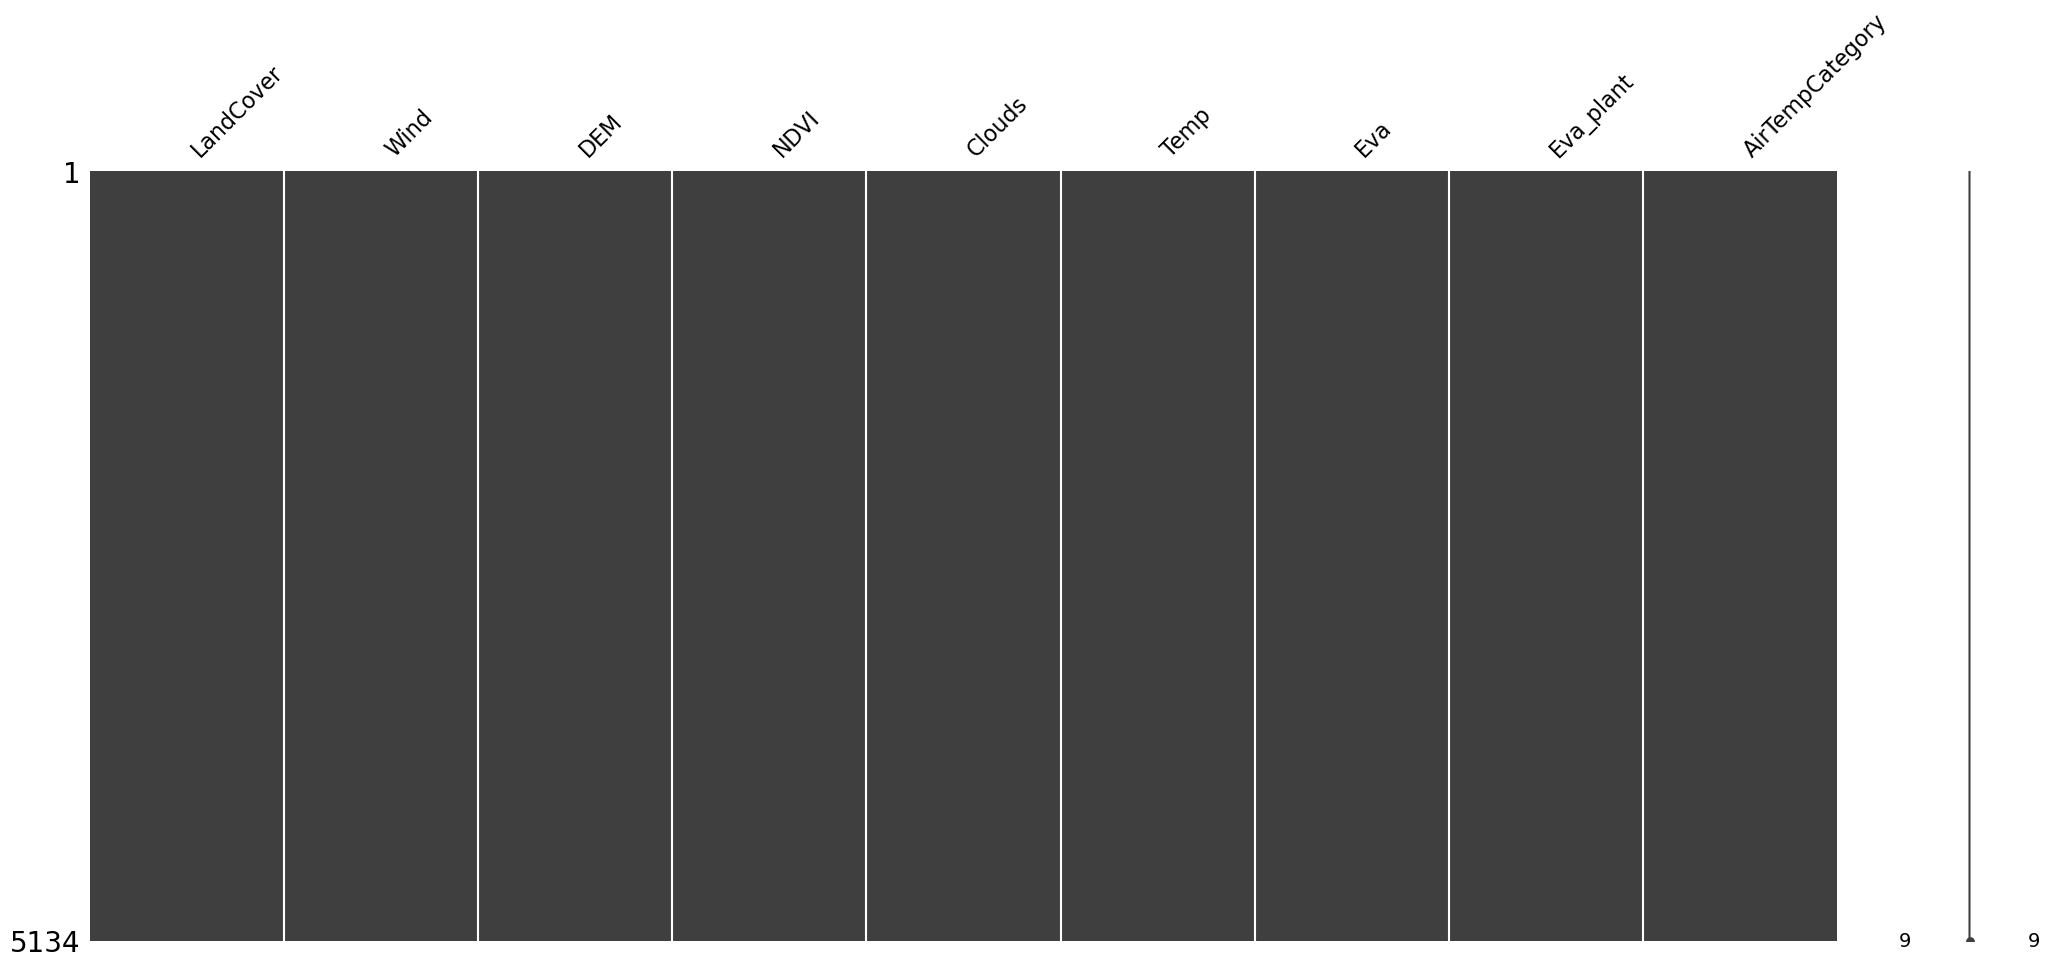

In [64]:
import missingno as msno
msno.matrix(df)

<AxesSubplot: >

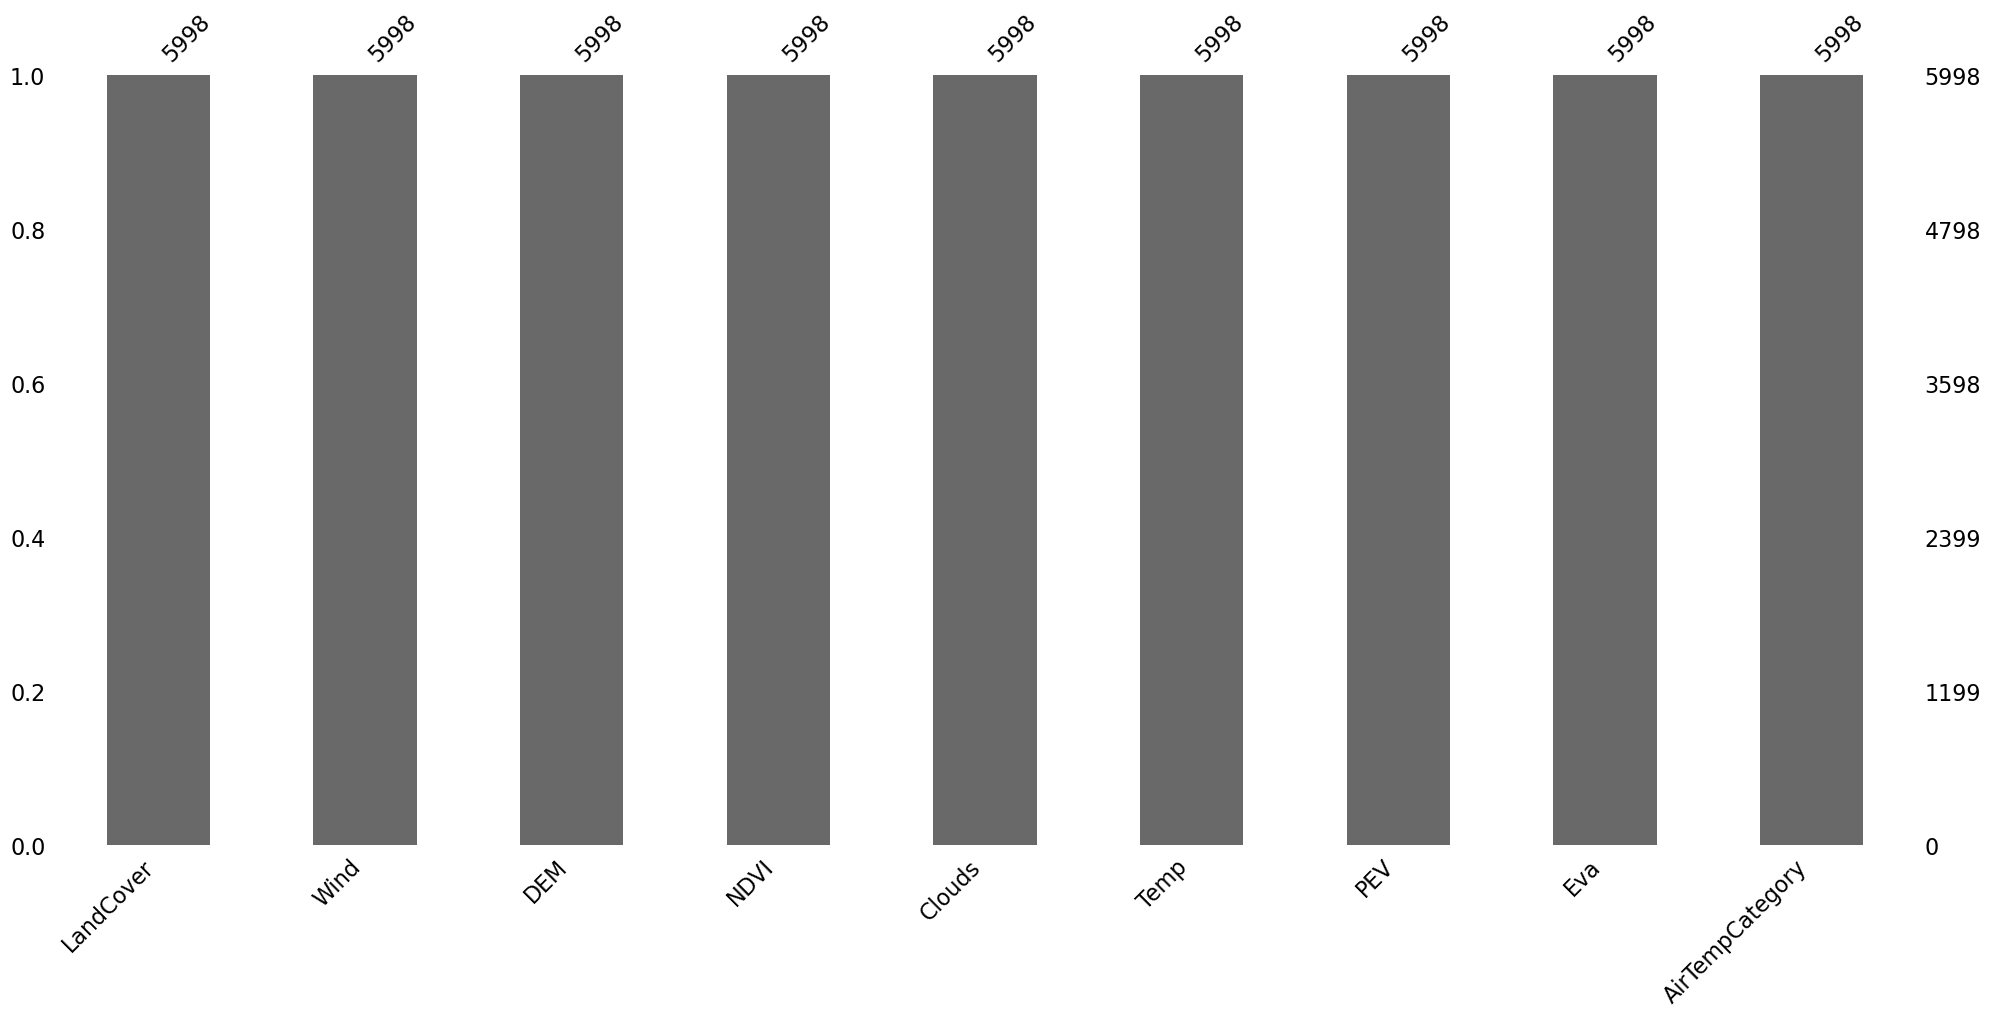

In [256]:
msno.bar(df)